<h1>Gauge transform</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xlim = (-2*np.pi/3,2*np.pi/3)
ylim = (-2*np.pi/np.sqrt(3),2*np.pi/np.sqrt(3))

def brilluoin_zone_mesh(d_kx,d_ky):

    kx_lim = (-2*np.pi/3,2*np.pi/3)
    ky_lim = (-2*np.pi/np.sqrt(3),2*np.pi/np.sqrt(3))
    Nx = int((kx_lim[1]-kx_lim[0])/d_kx)
    Ny = int((ky_lim[1]-ky_lim[0])/d_ky)
    kx = np.linspace(*kx_lim,Nx,endpoint=False)
    ky = np.linspace(*ky_lim,Ny,endpoint=False)
        
    return np.meshgrid(kx,ky,indexing='ij')

In [3]:
def fk(kx,ky):
    return 1+np.exp(1j*(1.5*kx+np.sqrt(3)/2*ky))+np.exp(1j*(1.5*kx-np.sqrt(3)/2*ky))

def ek(kx,ky,m):
    return np.sqrt(np.abs(fk(kx,ky))**2+m**2)

def rhoEq(kx,ky,temp,**opt):
    if temp == 0:
        return 0.5*(s0-hk_ek(kx,ky,**opt))
    else:
        return 0.5*(s0-np.einsum('ijkl,ij->ijkl',hk_ek(kx,ky,**opt),
                                 np.tanh(0.5*ek(kx,ky,**opt)/temp)))
    
def hk(kx,ky,m):
    return np.einsum('ij,mn->ijmn',fk(kx,ky).real,s1) \
         + np.einsum('ij,mn->ijmn',fk(kx,ky).imag,s2) \
         + m*s3

def hk_ek(kx,ky,m):
    return np.einsum('ijkl,ij->ijkl',hk(kx,ky,m),1/ek(kx,ky,m))

s0 = np.array([[1,0],[0,1]],dtype=complex)
s1 = np.array([[0,1],[1,0]],dtype=complex)
s2 = np.array([[0,-1j],[1j,0]],dtype=complex)
s3 = np.array([[1,0],[0,-1]],dtype=complex)

In [4]:
kx,ky = brilluoin_zone_mesh(0.1,0.1)

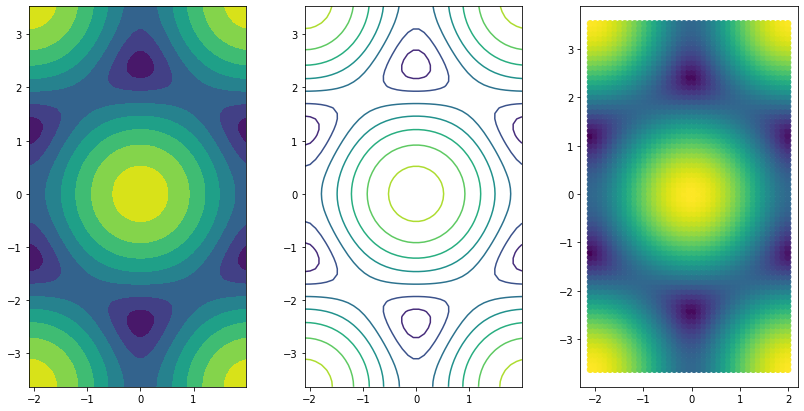

In [5]:
plt.figure(figsize=(14,7))
plt.subplot(131)
plt.contourf(kx,ky,ek(kx,ky,m=0))
plt.gca().set_aspect('equal',adjustable='box')
plt.subplot(132)
plt.contour(kx,ky,ek(kx,ky,m=0))
plt.gca().set_aspect('equal',adjustable='box')
plt.subplot(133)
plt.scatter(kx,ky,c=ek(kx,ky,m=0))
plt.gca().set_aspect('equal',adjustable='box')

In [6]:
A = 5
kx1 = kx - A
ky1 = ky - A

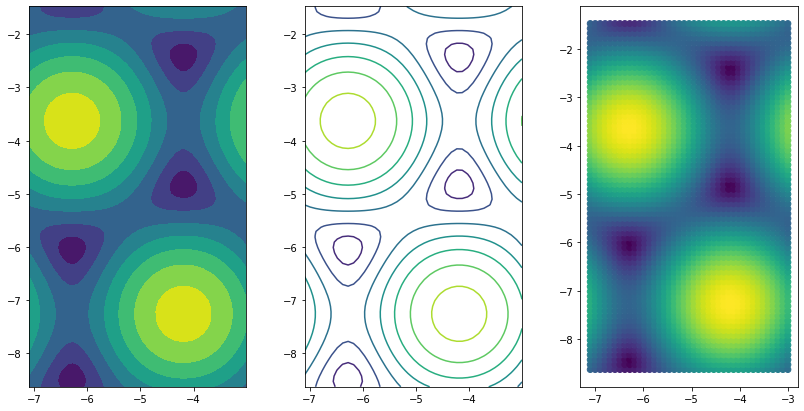

In [7]:
plt.figure(figsize=(14,7))
plt.subplot(131)
plt.contourf(kx1,ky1,ek(kx1,ky1,m=0))
plt.gca().set_aspect('equal',adjustable='box')
plt.subplot(132)
plt.contour(kx1,ky1,ek(kx1,ky1,m=0))
plt.gca().set_aspect('equal',adjustable='box')
plt.subplot(133)
plt.scatter(kx1,ky1,c=ek(kx1,ky1,m=0))
plt.gca().set_aspect('equal',adjustable='box')

In [8]:
kx2 = np.mod(kx1-xlim[0],xlim[1]-xlim[0])+xlim[0]
ky2 = np.mod(ky1-ylim[0],ylim[1]-ylim[0])+ylim[0]
xx = kx2[:,0].argsort()
yy = ky2[0,:].argsort()
x,y = np.meshgrid(xx,yy,indexing='ij')

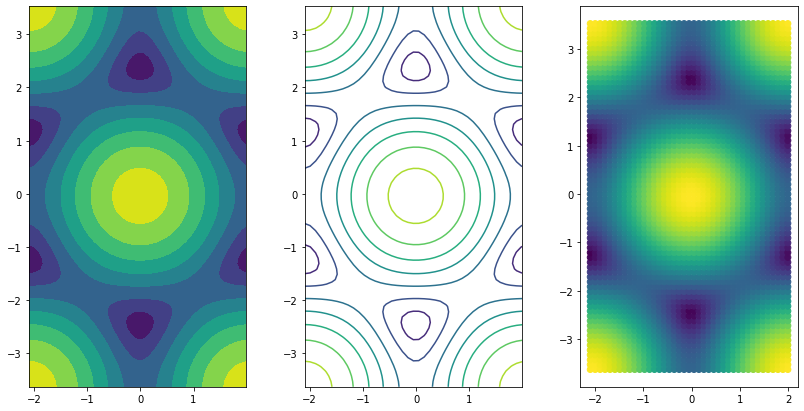

In [9]:
plt.figure(figsize=(14,7))
plt.subplot(131)
plt.contourf(kx,ky,ek(kx2,ky2,m=0)[x,y])
plt.gca().set_aspect('equal',adjustable='box')
plt.subplot(132)
plt.contour(kx,ky,ek(kx1,ky1,m=0)[x,y])
plt.gca().set_aspect('equal',adjustable='box')
plt.subplot(133)
plt.scatter(kx,ky,c=ek(kx2,ky2,m=0)[x,y])
plt.gca().set_aspect('equal',adjustable='box')